In [56]:
import zipfile
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import pytesseract
import cv2 as cv
import numpy as np
import glob
from os.path import basename

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

#unzip images.zip file into images/
with zipfile.ZipFile("readonly/images.zip","r") as zip_ref:
    zip_ref.extractall("images/")


#ask user input search string
search = input("Search for this string: ")

#search for string in every file
pngs = glob.glob("images/*.png")
dict = {}
for png in pngs:
    text = pytesseract.image_to_string(png)
    #if results are founded, search for faces in the .png file
    if search in text:
        ##...search for faces into file
        
        cv_img = cv.imread(png)
        faces = face_cascade.detectMultiScale(cv_img,1.3,5)
        dict[png] = faces

print(dict)


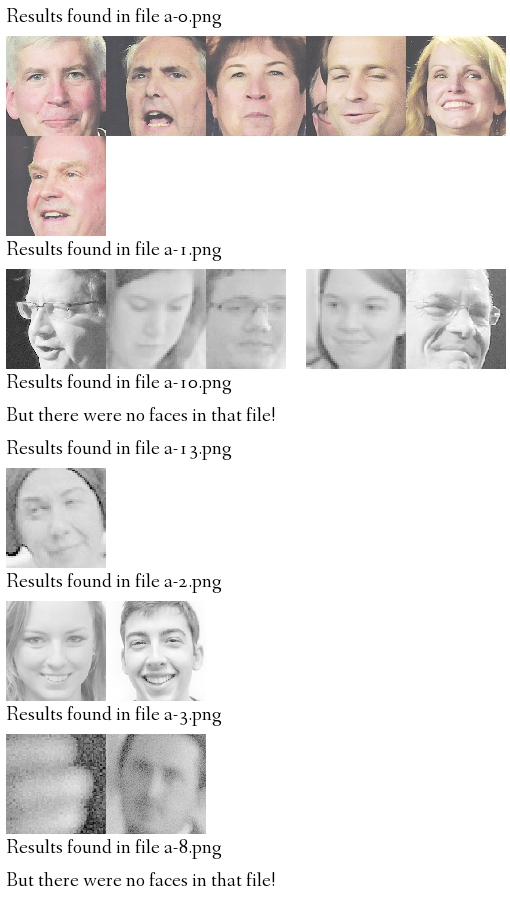

In [67]:


def get_height(dictionary):
    """
    Get the height of white background
    """
    #33 pixel for "Results found in file"
    wheight = len(dictionary)*33
    con=0
    for i in dictionary:
        #Add 6 white pixels at the last row
        if con == (len(dictionary)-1):
            wheight +=6
        #33 pixel for "But there were no faces in that file!"
        if len(dictionary[i]) == 0:
            wheight += 33
        #100 pixels for one row of images    
        elif len(dictionary[i]) <= 5:
            wheight += 100
        #200 pixels for two rows of images
        #TODO parametrize this!
        else:
            wheight += 200
        con +=1
    return wheight


bi=Image.new('RGBA', (510, get_height(dict)), 'white')
# Set our drawing context
font=ImageFont.truetype("readonly/fanwood-webfont.ttf", 20)
height=3
con=0
for i in dict:
    draw=ImageDraw.Draw(bi)
    draw.text((6,5+height), "Results found in file "+basename(i), font=font, fill='black')
    pil_img=Image.open(i).convert("RGB")
    height += 33
    if len(dict[i]) > 0:
        hcon=0
        for x,y,w,h in dict[i]:
            img = pil_img.crop((x,y,x+w,y+h))
            if hcon > 4:
                bi.paste(img.resize((100, 100)), ((6,height+100)))
            else:
                bi.paste(img.resize((100, 100)), ((hcon*100+6,height)))
            hcon += 1
        if len(dict[i]) == 0:
            height += 33
        elif len(dict[i]) <= 5:
            height +=100
        else:
            height +=200
    elif len(dict[i]) == 0:
        draw.text((6,5+height), "But there were no faces in that file!", font=font, fill='black')
        height += 33

display(bi)
